In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# This is used if the dataset if stored in google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import dataset

In [107]:
'''
Load the dataframe in csv
substitute the name of csv file 'volkswagen_e_golf.csv' by the data we interested
'''
# dataset = pd.read_csv('/content/drive/MyDrive/Courses/1. Chem 545 546/Project/volkswagen_e_golf.csv',encoding='latin-1')

dataset0 = pd.read_csv('/content/drive/MyDrive/Chem 545 546/Project/Prediction_Tensorflow/all_data.csv',encoding='latin-1')

df = pd.DataFrame(dataset0)

dataset0.head()


,Unnamed: 0,ZIPCODE,Year,AAWDT,Total_Population,Pop_fraction,RACK_CAPACITY,Miles_Bike_Lanes
0,0,98101,2007,264800.0,9478.973121,0.016191,16,0.000000
1,1,98101,2008,254100.0,9583.147981,0.016191,42,0.320152
2,2,98101,2009,254100.0,9691.127797,0.016191,68,0.583919
3,3,98101,2010,257900.0,9855.000000,0.016191,72,0.000000
4,4,98101,2011,353100.0,10082.228780,0.016191,92,0.000000


In [92]:
dataset0.isna().sum()

Unnamed: 0          0
ZIPCODE             0
Year                0
AAWDT               0
Total_Population    0
Pop_fraction        0
RACK_CAPACITY       0
Miles_Bike_Lanes    0
dtype: int64

In [28]:
# clean the data
dataset0 = dataset0.dropna()
dataset0.isna().sum()

Unnamed: 0          0
ZIPCODE             0
Year                0
AAWDT               0
Total_Population    0
Pop_fraction        0
RACK_CAPACITY       0
Miles_Bike_Lanes    0
Sidewalk_length     0
dtype: int64

# Get the features and labels

In [116]:
'''
Here specify the features and labels
'''
# Normlized
features_select = ['Total_Population', 'Pop_fraction', 'RACK_CAPACITY', 'Miles_Bike_Lanes'] # name of features
label_select = ['AAWDT'] # name of label

#### Note the the prediction should use the same Normlization
dataset=(dataset0-dataset0.mean())/dataset0.std() # Normlized the data
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset[features_select]
test_features = test_dataset[features_select]

train_labels = train_dataset[label_select]
test_labels = test_dataset[label_select]

# Import the prediction function

In [110]:
import pickle

# load the weights of neural network
f = open('/content/drive/MyDrive/Chem 545 546/Project/Prediction_Tensorflow/Weights/Weights_MultiFeatures.pckl', 'rb')
[W1, b1, W2, b2,W3, b3]= pickle.load(f)
f.close()

In [114]:
def Predict_function(Predict_input, W1, b1, W2, b2, W3, b3):
    '''
    The prediction function represented by neural network with tanh activation
    Predict_input is the data after normlization
    '''
    Predict_output = function_tanh(function_tanh(Predict_input@W1+b1)\
                                   @ W2 + b2) @ W3 + b3
    return Predict_output


def Predict_function_Normalization(Predict_input, Norm_mean, Norm_std,\
                                   W1, b1, W2, b2, W3, b3):
    '''
    The prediction function represented by neural network with tanh activation
    Predict_input is the raw data withour normlization
    Predict_df is the dataframe for prediction
    '''
    Predict_input = (Predict_input-Norm_mean)/Norm_std
    Predict_output = function_tanh(function_tanh(Predict_input@W1+b1)\
                                   @ W2+b2)@W3+b3
    return Predict_output


def function_tanh(x):
    '''
    tanh activation function
    '''
    y = (2 / (1 + np.exp(-2 * x))) - 1
    return y

# Use the function

In [112]:
'''
Here shows how to use the function for prediction with the features after normalization
'''
Predict_function(train_features.values,W1, b1, W2, b2,W3, b3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


array([[ 7.30552897],
       [-3.78920295],
       [ 7.30552897],
       [ 7.30552897],
       [-3.78920295],
       [ 7.30552897],
       [ 7.30552897],
       [-3.78920295],
       [ 7.30552897],
       [ 7.30552897],
       [-3.78920295],
       [ 7.30552897],
       [ 7.30552897],
       [ 7.30552897],
       [-3.78920295]])

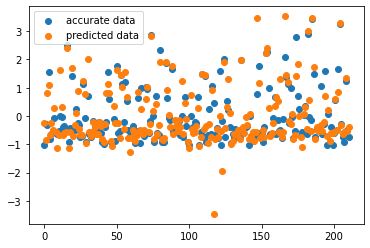

In [119]:
# Compare the true labels and the predicted labels
plt.scatter(range(np.shape(train_labels.values)[0]),train_labels.values,label='accurate data')
plt.scatter(range(np.shape(train_labels.values)[0]),Predict_function(train_features.values,W1, b1, W2, b2,W3, b3),label='predicted data')
plt.legend()


# Test changeing one feature by proportion

In [124]:
feature0 = dataset0.mean()[features_select]
list_propotion = np.arange(0,2,0.2)
feature_idx = 2
list_prediction = []
Norm_mean = dataset0.mean()[features_select]
Norm_std = dataset0.std()[features_select]
label_mean = dataset0.mean()[label_select]
label_std = dataset0.std()[label_select]

for propotion in list_propotion:
    feature_test = feature0.copy()
    feature_test[feature_idx] = feature0[feature_idx]*propotion
    Label_test = Predict_function_Normalization(feature_test,Norm_mean,Norm_std,W1, b1, W2, b2,W3, b3)
    list_prediction.append(Label_test*label_std+label_mean)

Text(0.5, 1.0, 'RACK_CAPACITY')

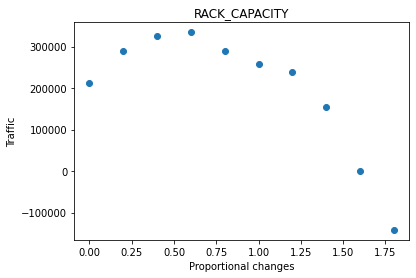

In [125]:
plt.scatter(list_propotion,list_prediction)
plt.xlabel('Proportional changes')
plt.ylabel('Traffic')
plt.title(features_select[feature_idx])

# Unit Test

In [ ]:
def test_Predict_function_Normalization():
    '''
    test Predict_function_Normalization
    '''
    f = open('/content/drive/MyDrive/Chem 545 546/Project/Prediction_Tensorflow/Weights/Weights_MultiFeatures.pckl', 'rb')
    [W1, b1, W2, b2,W3, b3]= pickle.load(f)
    f.close()

    x = np.ones((1,3))
    Norm_mean=np.ones((1,3))
    Norm_std=np.ones((1,3))
    y=Predict_function_Normalization(x,Norm_mean,Norm_std,W1, b1, W2, b2,W3, b3)
    assert np.allclose(y,
              function_tanh(function_tanh(b1)@W2+b2)@W3+b3), "unexpected result for Predict_function"
    return

In [ ]:
def test_Predict_function():
    '''
    test tanh Predict_function
    '''
    f = open('/content/drive/MyDrive/Chem 545 546/Project/Prediction_Tensorflow/Weights/Weights_MultiFeatures.pckl', 'rb')
    [W1, b1, W2, b2,W3, b3]= pickle.load(f)
    f.close()
    x = np.zeros((1,3))
    # Predict_function(x,W1, b1, W2, b2,W3, b3)
    assert np.allclose(Predict_function(x,W1, b1, W2, b2,W3, b3),
                  function_tanh(function_tanh(b1)@W2+b2)@W3+b3), "unexpected result for Predict_function"
    return



In [ ]:
def test_function_tanh():
    '''
    test tanh activation function
    '''
    x = 0
    assert np.all(function_tanh(x) ==
                  0), "unexpected result for function_tanh"
    return

